## [실습] Scikit-learn 선형회귀로 주택가격 예측하기

### 목표
- 보스턴 주택가격 데이터를 이용하여 회귀에 사용될 **독립변수(피쳐) 추출** 본다.
- 사이킷런 회귀 모델을 이용하여 **주택가격을 예측하는 모델**을 만들어 본다.
- **모델을 평가**해 본다.

### 머신러닝 모델(회귀)
- **선형회귀**  

### 평가지표
- RMSE(Root Mean Squared Error)
- 예측값과 실제값의 차이 잔차의 평균 제곱 오차

------------------

- 1.데이터 준비하기
- 2.데이터 전처리
- 3.모델링
- 4.모델 성능 평가

----------

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 준비하기

- 다운로드:  https://www.kaggle.com/altavish/boston-housing-dataset?select=HousingData.csv
- HousingData.csv 

In [2]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### 2. 데이터 전처리

### 2-1. 기본 정보 확인

#### 데이터의 개수 확인

In [3]:
df.shape

(506, 14)

#### 컬럼정보 

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

| 필드명 | 설명 | 값 종류 |
|------|------|------|
|**CRIM** |자치시(town)별 1인당 범죄율 |	|
|ZN |25,000평방 피크를 초과하는 거주지역의 비율  |	|
|INDUS |비소매상업지역이 점유하고 있는 토지의 비율  |	|
|CHAS |찰스강 인접여부  |0=No, 1=Yes	|
|NOX |10ppm당 농축 일산화질소  |	|
|RM |주택 1가구당 평균 방의 개수  |	|
|AGE |1940년 이전에 건축된 소유주택의 비율  |	|
|DIS |5개의 보스턴 직업센터까지의 접근성 지수  |	|
|RAD |방사형 도로까지의 접근성 지수  |	|
|TAX |10,000 달러 당 재산세율  |	|
|PTRATIO |자치시(town)별 학생/교사 비율  |	|
|B |1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율  |	|
|LSTAT |모집단의 하위계층의 비율(%)  |	|
|MEDV |본인 소유의 주택가격(중앙값) (단위: $1,000)  |	|

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### 시각화

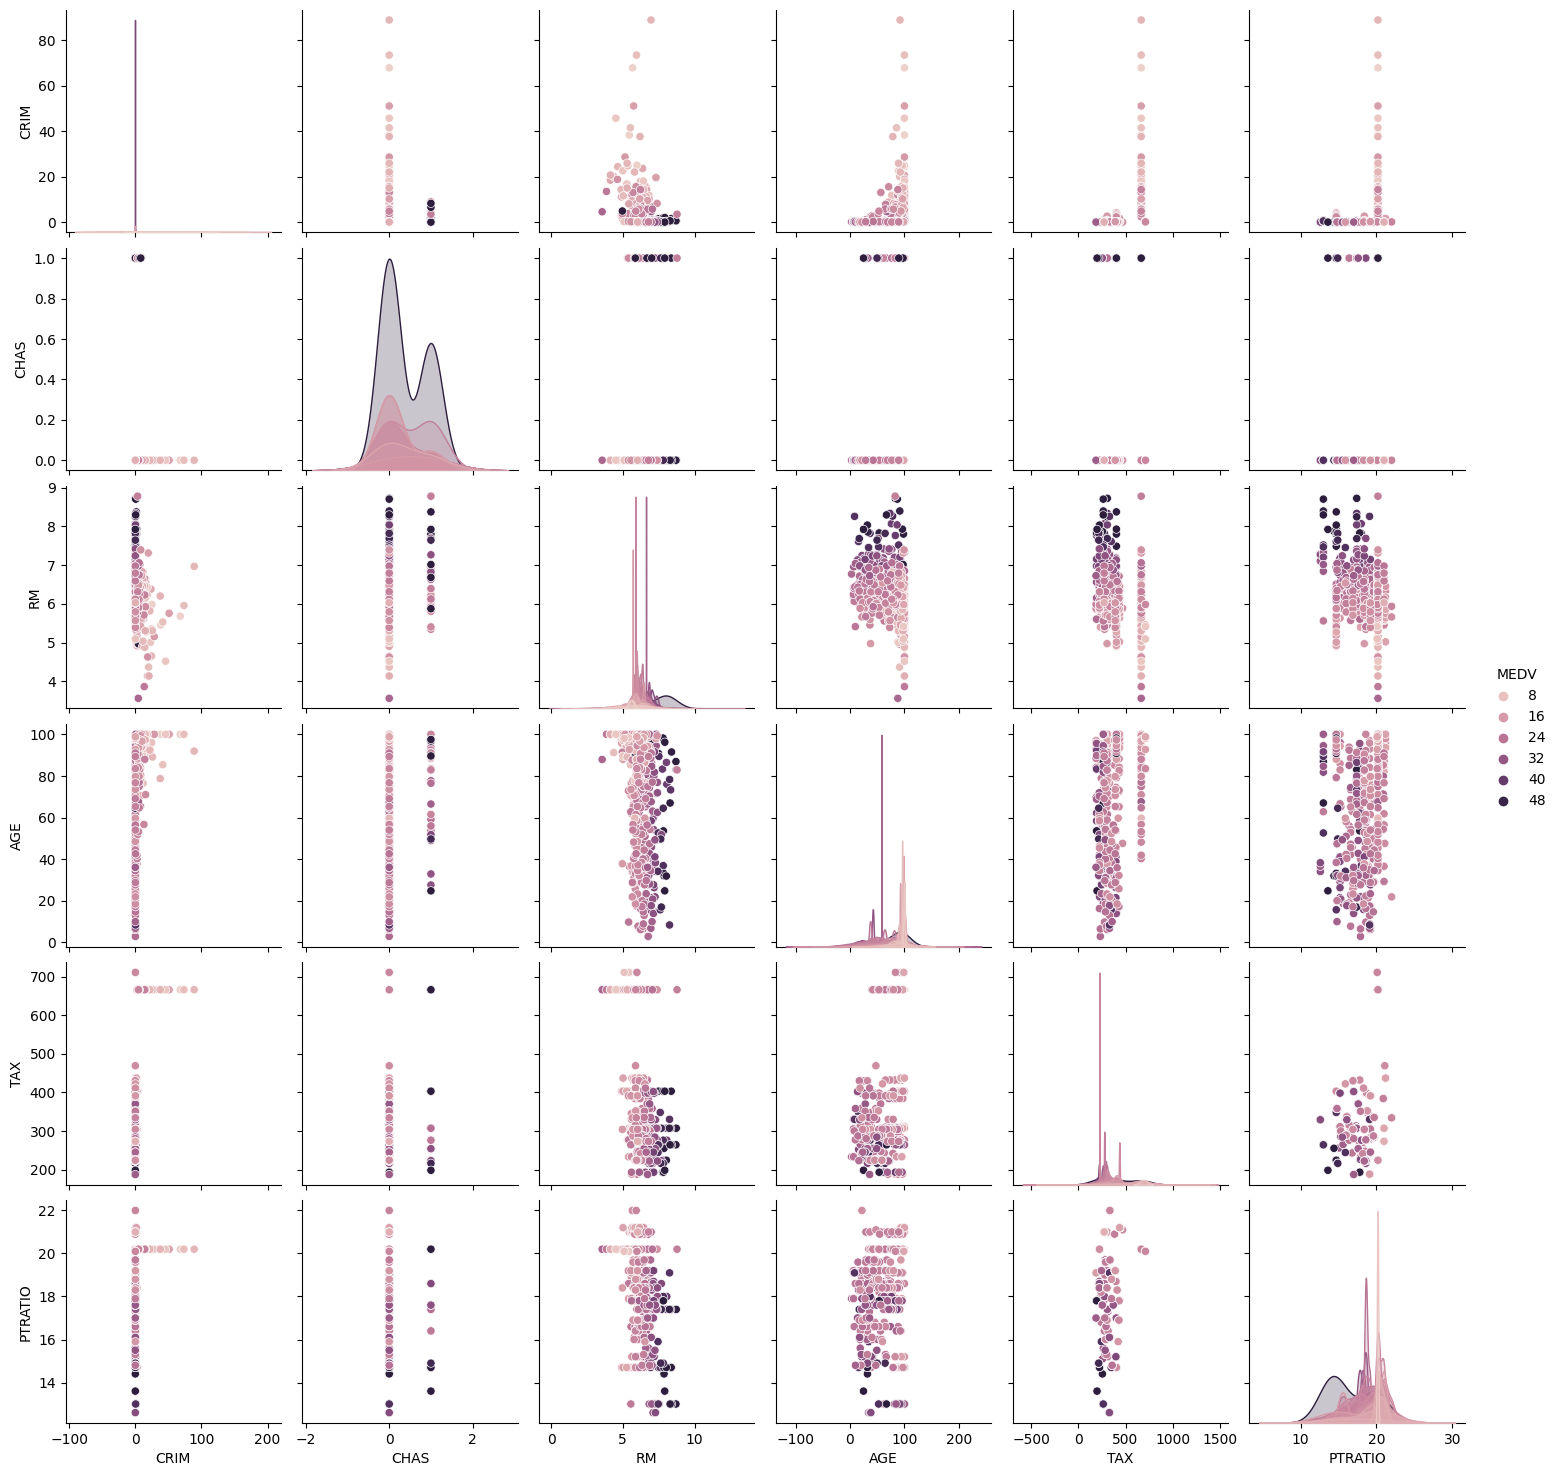

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# MEDV와 다른 변수들 간의 관계를 시각화한다.
# sns.pairplot(df, hue='MEDV')

#특정 필드만 추출
df_tmp = df[['CRIM','CHAS','RM','AGE','TAX','PTRATIO','MEDV']]
sns.pairplot(df_tmp, hue='MEDV')

plt.show()

### 2-2.상관계수로 연관된 필드 확인

#### 상관계수 

In [7]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


#### 상관계수 시각화하기

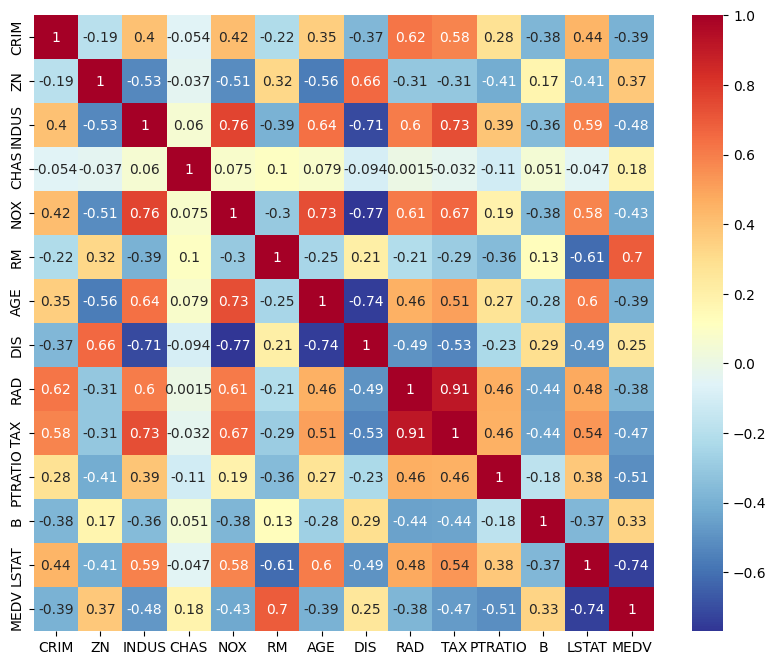

In [8]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlBu_r')
plt.show()

#### 특정 컬럼과 나머지 컬럼간의 상관계수 계산
- 데이터타입이 숫자일때 가능하다

In [9]:
df.corrwith(df['LSTAT'])

CRIM       0.444943
ZN        -0.414193
INDUS      0.590690
CHAS      -0.047424
NOX        0.582641
RM        -0.614339
AGE        0.602891
DIS       -0.493328
RAD        0.479541
TAX        0.536110
PTRATIO    0.375966
B         -0.369889
LSTAT      1.000000
MEDV      -0.735822
dtype: float64

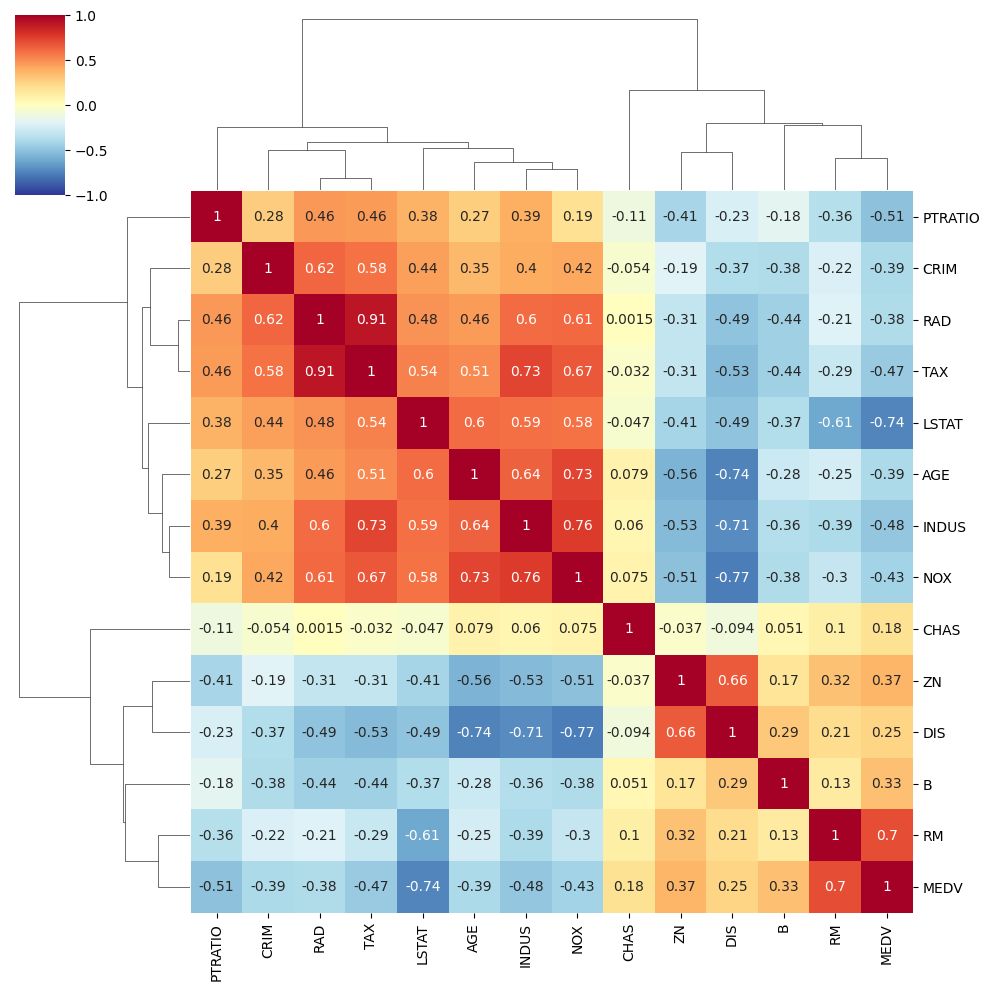

In [10]:
sns.clustermap(df.corr(),
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)

#### Target변수와 상관관계가 높은 순으로 출력

In [11]:
df.corr().loc[:'LSTAT', 'MEDV'].abs().sort_values(ascending=False)

#상관관계 높은 순 
# > 0.4 : LSTAT RM PTRATIO  INDUS  TAX  NOX    
# > 0.35 : AGE CRIM RAD ZN                             

LSTAT      0.735822
RM         0.695360
PTRATIO    0.507787
INDUS      0.481772
TAX        0.468536
NOX        0.427321
AGE        0.394656
CRIM       0.391363
RAD        0.381626
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
Name: MEDV, dtype: float64

#### 시각화로 분석할 피처(독립변수) 선택

In [12]:
cols = ['MEDV','LSTAT','RM','PTRATIO','INDUS','TAX','NOX']
df2 = df[cols]
df2

,MEDV,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,24.0,4.98,6.575,15.3,2.31,296,0.538
1,21.6,9.14,6.421,17.8,7.07,242,0.469
2,34.7,4.03,7.185,17.8,7.07,242,0.469
3,33.4,2.94,6.998,18.7,2.18,222,0.458
4,36.2,NaN,7.147,18.7,2.18,222,0.458
...,...,...,...,...,...,...,...
501,22.4,NaN,6.593,21.0,11.93,273,0.573
502,20.6,9.08,6.120,21.0,11.93,273,0.573
503,23.9,5.64,6.976,21.0,11.93,273,0.573
504,22.0,6.48,6.794,21.0,11.93,273,0.573


#### regplot으로 선형회귀선 표시

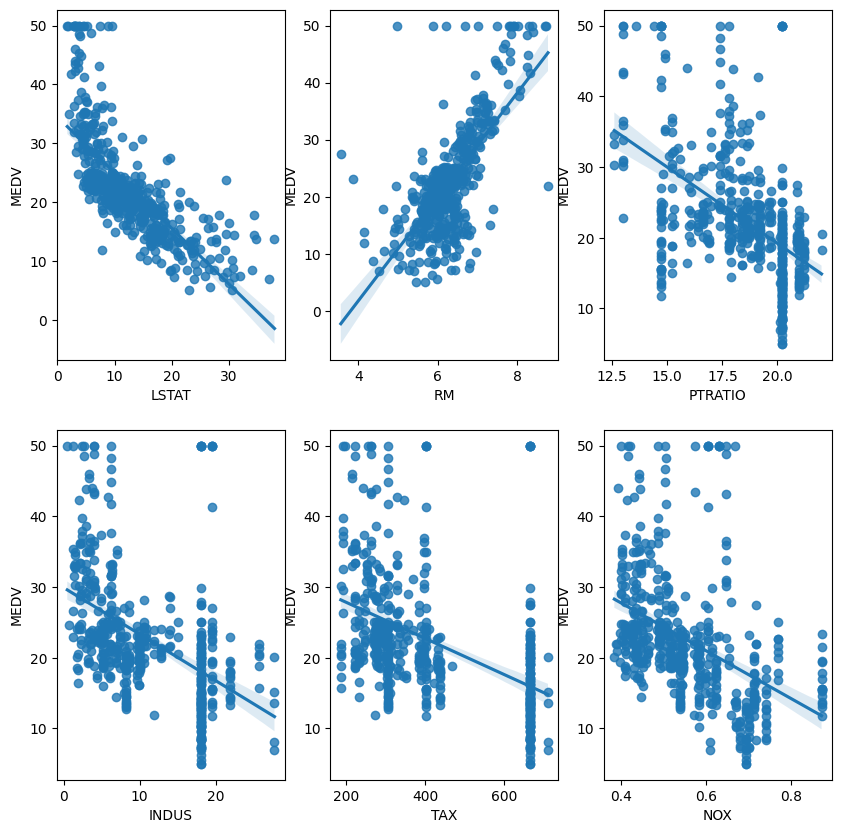

In [13]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(cols[1:]):
    ax = plt.subplot(2, 3, idx+1)
    sns.regplot(data=df2, x=col, y='MEDV', ax=ax)
plt.show()

#### MEDV(Target 주택가격) 시각화

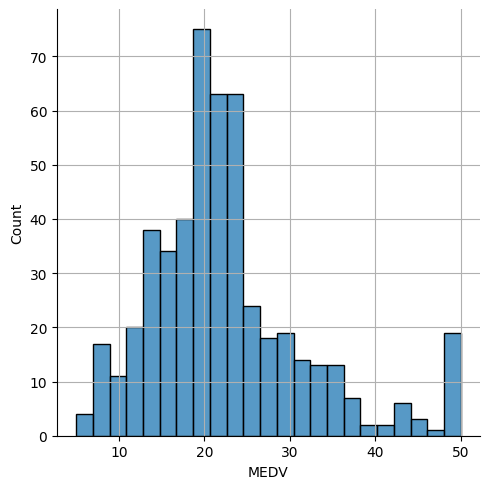

In [14]:
# 히스토그램
sns.displot(data=df2, x='MEDV', kind='hist') 
plt.grid()
plt.show()

### 2-3.결측치 처리

#### 결측값 확인

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   LSTAT    486 non-null    float64
 2   RM       506 non-null    float64
 3   PTRATIO  506 non-null    float64
 4   INDUS    486 non-null    float64
 5   TAX      506 non-null    int64  
 6   NOX      506 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 27.8 KB


In [16]:
df2.isnull().sum()

MEDV        0
LSTAT      20
RM          0
PTRATIO     0
INDUS      20
TAX         0
NOX         0
dtype: int64

#### 결측치 제거

In [17]:
df2.dropna(how='all', inplace=True)   # 전체컬럼값이 null 데이터 삭제
df2.dropna(subset=['LSTAT'], how='all', inplace=True)
df2.dropna(subset=['INDUS'], how='all', inplace=True)
df2.isnull().sum()

MEDV       0
LSTAT      0
RM         0
PTRATIO    0
INDUS      0
TAX        0
NOX        0
dtype: int64

### 2-4.정규화 & 표준화

- **정규화(Normalization)** : 0 ~ 1 사이의 값으로 변환
- **표준화(Standardization)** : 평균이 0이고 표준편차가 1인 값으로 변환
- 머신러닝 성능 향상을 위한 방법
- 정규화와 표준화는 모두 머신러닝 알고리즘을 훈련시키는데 있어서 사용되는 특성(feature)들이 모두 비슷한 영향력을 행사하도록 값을 변환해주는 기술

#### MinMaxScaler로 독립변수 정규화하기

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 스케일링에 적용할 데이터 준비
df_scaled = df2.iloc[:, 1:]   # 첫 열(MEDV) 제외

# 스케일러에 적용
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

#스케일링 변환된 값을 데이터프레임에 반영
df2.iloc[:, 1:] = df_scaled[:, :]
df2.head()

,MEDV,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,24.0,0.089680,0.577505,0.287234,0.067815,0.208015,0.314815
1,21.6,0.204470,0.547998,0.553191,0.242302,0.104962,0.172840
2,34.7,0.063466,0.694386,0.553191,0.242302,0.104962,0.172840
3,33.4,0.033389,0.658555,0.648936,0.063050,0.066794,0.150206
5,28.7,0.096026,0.549722,0.648936,0.063050,0.066794,0.150206


### 3. 모델링

### 3-1. 학습용 데이터 준비

In [19]:
df2.head()
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     466 non-null    float64
 1   LSTAT    466 non-null    float64
 2   RM       466 non-null    float64
 3   PTRATIO  466 non-null    float64
 4   INDUS    466 non-null    float64
 5   TAX      466 non-null    float64
 6   NOX      466 non-null    float64
dtypes: float64(7)
memory usage: 29.1 KB


,MEDV,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,22.536481,0.300281,0.522700,0.620742,0.390702,0.423435,0.348168
std,9.341778,0.196914,0.134505,0.234553,0.251759,0.320925,0.236205
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,0.144040,0.445919,0.468085,0.171738,0.179389,0.131687
50%,21.200000,0.264901,0.507281,0.680851,0.338343,0.272901,0.314815
75%,25.000000,0.416874,0.586798,0.808511,0.646628,0.914122,0.491770
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3-2. 학습용, 테스트 데이터 분리하기

In [20]:
from sklearn.model_selection import train_test_split

X = df2.iloc[:, 1:]
y = df2.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(372, 6) (372,)
(94, 6) (94,)


### 3-3.모델 훈련 및 테스트

#### # 선형 회귀 모델 : LinearRegression()
- Ordinary least squares Linear Regression.

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

print("회귀계수(기울기):", np.round(lr.coef_, 1)) # np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  # intercept_: 상수항(절편) 값

회귀계수(기울기): [-19.7  22.8  -8.6   2.   -1.8  -2. ]
상수항(절편): 22.6


#### 모델 예측

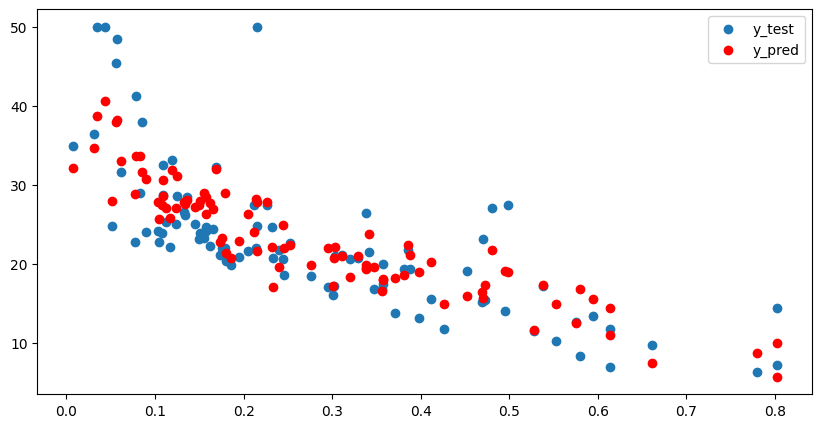

In [22]:
y_pred = lr.predict(X_test)

#예측값과 실제값의 분포 시각화
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.scatter(X_test['LSTAT'], y_test, label='y_test')  #파란점, 실제값
plt.scatter(X_test['LSTAT'], y_pred, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

### 4.모델 성능 평가

- 성능 지표 : MSE, RMSE, R2-score
- MSE(Mean Squared Error): 평균 제곱 오차, 예측값과 실제값의 차이 잔차의 제곱을 평균한 값
- RMSE(Root Mean Squared Error): MSE의 제곱근
- R2(R-squared): 예측 값의 분산/실제값의 분산, 1 일때 설명력이 높다, 절대 지표로 사용

In [23]:
from sklearn.metrics import mean_squared_error

y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
train_rmse= np.sqrt(train_mse)   # 제곱근
print("Train MSE : %.4f" % train_mse)
print("Train RMSE : %.4f" % train_rmse)

mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
print("Test MSE : %.4f" % mse)
print("Test RMSE : %.4f" % rmse)


# R2(R-squared), 결정 계수 :  예측 값의 분산/실제값의 분산,
# 1에 가까울 때 설명력이 높다, 절대 지표로 사용
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('r2_score:', r2) 

Train MSE : 28.6082
Train RMSE : 5.3487
Test MSE : 25.1195
Test RMSE : 5.0119
r2_score: 0.6932948849054841


-------------------

끝